In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_olivetti_faces

In [ ]:
faces = fetch_olivetti_faces()
df = pd.DataFrame(data=faces.data,index=range(400))


In [ ]:
fig=plt.figure(figsize=(16,8))
for i in range(40):
    ax=fig.add_subplot(4,10,i+1,xticks=[i], yticks=[])
    ax.imshow(faces.images[i*10], cmap=plt.cm.bone)

# Showing the all images

fig=plt.figure(figsize=(64,64))
for i in range(400):
    ax=fig.add_subplot(25,16,i+1,xticks=[], yticks=[])
    ax.imshow(faces.images[i], cmap=plt.cm.bone)



In [ ]:
# Feature Scaling

scl = StandardScaler()
faces_data = scl.fit_transform(faces.data)

In [ ]:
# Transformed data by LDA

lda=LinearDiscriminantAnalysis(n_components=2)
X_train_lda=lda.fit(faces_data, faces.target)
X_train=lda.transform(faces_data)


Text(0, 0.5, 'LDA2')

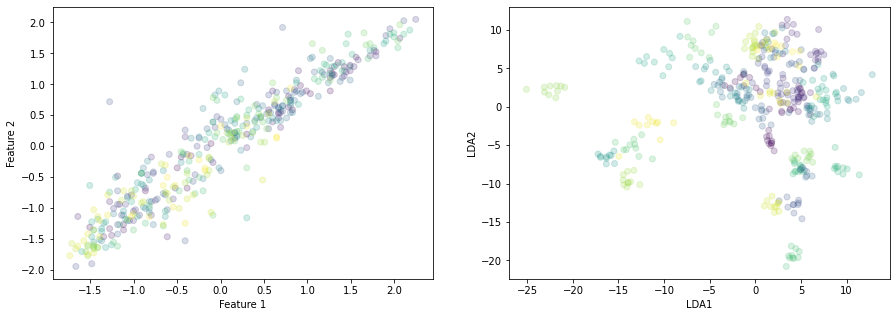

In [ ]:
fig = plt.figure(figsize=(15,5))
fig.add_subplot(1,2,1)
plt.scatter(faces_data[:,0], faces_data[:,1], alpha=0.2, c=faces.target, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
#fig.add_subplot(1,3,2)
#plt.scatter(faces_data[:,0], faces_data[:,2], alpha=0.2, c=faces.target, cmap='viridis')
fig.add_subplot(1,2,2)
plt.scatter(X_train[:,0], X_train[:,1], alpha=0.2, c=faces.target, cmap='viridis')
plt.xlabel('LDA1')
plt.ylabel('LDA2')

In [ ]:
# Performing LDA

dimension=[2,5,15]
for i in dimension:
    lda = LinearDiscriminantAnalysis(n_components = i)
    scoring = ['accuracy', 'precision_macro', 'recall_macro',  'f1_macro']
    scores = cross_validate(lda, faces_data, faces.target, scoring = scoring, cv = 3)
    print('{}D-LDA'.format(i))
    print('Fit Time', scores['fit_time'].mean().round(3))
    print('Score Time', scores['score_time'].mean().round(3))
    print("Accuracy: %0.2f (+/- %0.2f)" % (scores['test_accuracy'].mean(), scores['test_accuracy'].std() * 2))
    print("Precision: %0.2f (+/- %0.2f)" % (scores['test_precision_macro'].mean(), scores['test_precision_macro'].std() * 2))
    print("Recall: %0.2f (+/- %0.2f)" % (scores['test_recall_macro'].mean(), scores['test_recall_macro'].std() * 2))
    print("f1-score: %0.2f (+/- %0.2f)" % (scores['test_f1_macro'].mean(), scores['test_f1_macro'].std() * 2))
    print('---')
    print(scores)

2D-LDA
Fit Time 0.445
Score Time 0.016
Accuracy: 0.97 (+/- 0.03)
Precision: 0.98 (+/- 0.02)
Recall: 0.97 (+/- 0.03)
f1-score: 0.97 (+/- 0.03)
---
{'fit_time': array([0.40935946, 0.45304227, 0.47327137]), 'score_time': array([0.01698399, 0.00817156, 0.02248025]), 'test_accuracy': array([0.99253731, 0.96240602, 0.96240602]), 'test_precision_macro': array([0.995     , 0.97291667, 0.97625   ]), 'test_recall_macro': array([0.99375   , 0.96458333, 0.9625    ]), 'test_f1_macro': array([0.99365079, 0.96238095, 0.9631746 ])}
5D-LDA
Fit Time 0.456
Score Time 0.009
Accuracy: 0.97 (+/- 0.03)
Precision: 0.98 (+/- 0.02)
Recall: 0.97 (+/- 0.03)
f1-score: 0.97 (+/- 0.03)
---
{'fit_time': array([0.45887446, 0.45067787, 0.45775723]), 'score_time': array([0.00829387, 0.00991654, 0.00805926]), 'test_accuracy': array([0.99253731, 0.96240602, 0.96240602]), 'test_precision_macro': array([0.995     , 0.97291667, 0.97625   ]), 'test_recall_macro': array([0.99375   , 0.96458333, 0.9625    ]), 'test_f1_macro': a

In [ ]:
 # Performing SVM with different kernels

models = []
models.append(("Linear-SVM", SVC(kernel='linear')))
models.append(("RBF-SVM", SVC(kernel='rbf')))
models.append(("Polynomial-SVM", SVC(kernel='poly')))
models.append(("Sigmoid-SVM", SVC(kernel='sigmoid')))


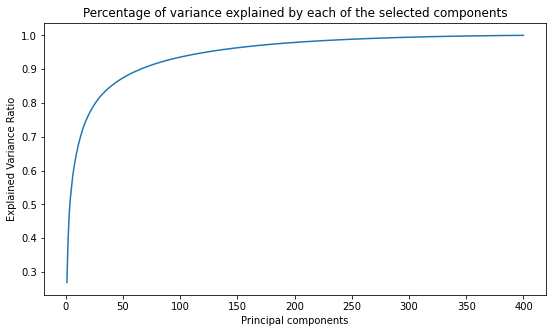

In [ ]:
 # Performing PCA
 import numpy as np
pca = PCA(n_components=400, svd_solver='randomized', whiten=True).fit(faces_data)
X_train_pca = pca.transform(faces_data)
dimension = np.array(range(1, 401))
variance = (pca.explained_variance_ratio_)
variance_cum = np.cumsum(variance)
plt.figure(figsize=(9, 5))
print(plt.plot(dimension, variance_cum))
plt.title('Percentage of variance explained by each of the selected components')
plt.xlabel('Principal components')
plt.ylabel('Explained Variance Ratio')
plt.show()

Text(0, 0.5, 'Second Principal Component')

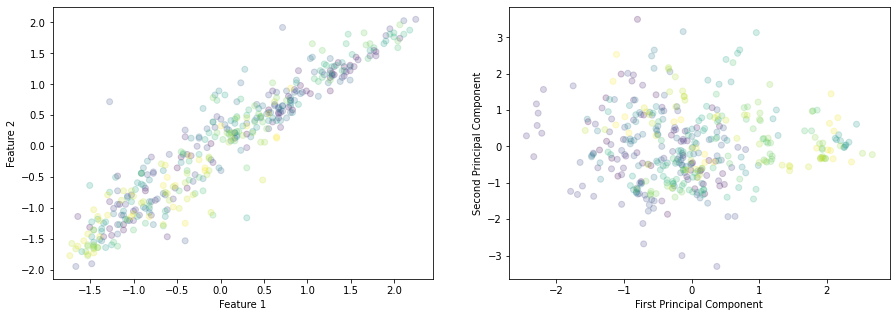

In [ ]:
# Performing 2D-PCA

pca = PCA(n_components=2, svd_solver='randomized', whiten=True).fit(faces_data)
X_train_pca = pca.transform(faces_data)
fig = plt.figure(figsize=(15, 5))
fig.add_subplot(1, 2, 1)
plt.scatter(faces_data[:, 0], faces_data[:, 1], alpha=0.2, c=faces.target, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
fig.add_subplot(1, 2, 2)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], alpha=0.2, c=faces.target, cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

Text(0.5, 1.0, '12.34% Explained Variance')

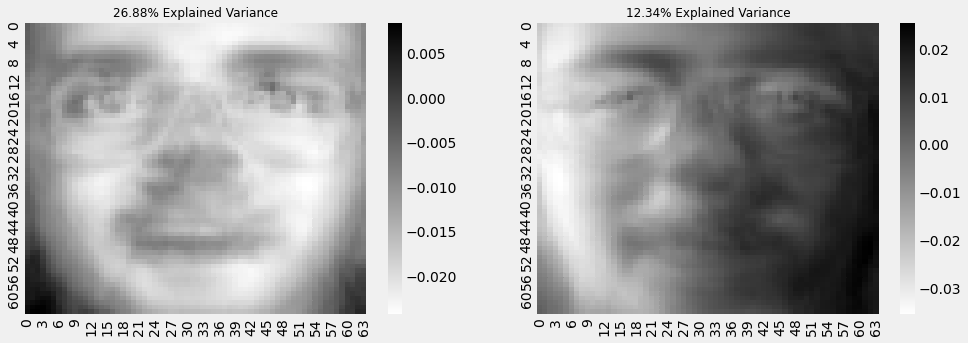

In [ ]:
 # Visualize the result of 2D-PCA

plt.style.use('fivethirtyeight')

fig, axarr = plt.subplots(1, 2, figsize=(15, 5))

sns.heatmap(pca.components_[0, :].reshape(64, 64), ax=axarr[0], cmap='gray_r')
sns.heatmap(pca.components_[1, :].reshape(64, 64), ax=axarr[1], cmap='gray_r')
axarr[0].set_title(
    "{0:.2f}% Explained Variance".format(pca.explained_variance_ratio_[0] * 100),
    fontsize=12
)
axarr[1].set_title(
    "{0:.2f}% Explained Variance".format(pca.explained_variance_ratio_[1] * 100),
    fontsize=12
)